In [1]:
#Import the Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Read the Train and Test data Set
train = pd.read_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\Black Day Sales Prediction\\train.csv")
test = pd.read_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\Black Day Sales Prediction\\test.csv")
submission = pd.read_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\Black Day Sales Prediction\\sample_submission.csv")

In [4]:
#Difference between Train and Test
train.columns.difference(test.columns)

Index(['Purchase'], dtype='object')

In [5]:
# Print the Record count
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Train shape: (550068, 12)
Test shape: (233599, 11)


In [6]:
#Concat/Join the Test and TRain dataset to do EDA
data = pd.concat([train, test],axis = 0)

In [7]:
#Information about Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
#Find the NA Values:
data.loc[:,~data.columns.isin(['Purchase'])].isna().sum().sort_values(ascending = False)

Product_Category_3            545809
Product_Category_2            245982
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
dtype: int64

In [22]:
#Find the Percentage of NA values:
total = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum())/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])

In [23]:
missing_data

,Total,Percent
Purchase,233599,0.298085
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

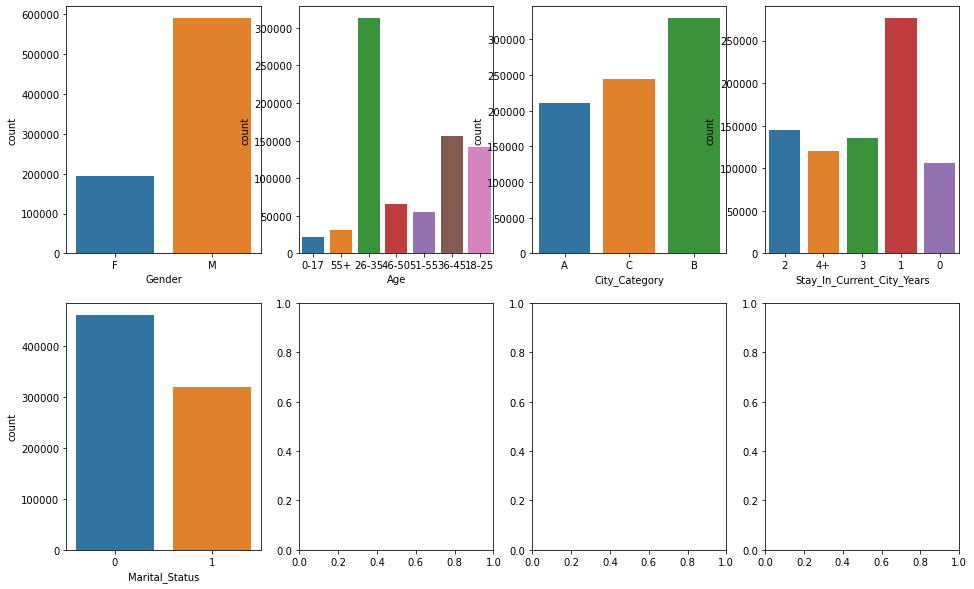

In [9]:
#Univariate Analysis and Bivariate Analysis 
fig,ax= plt.subplots(2,4,figsize=(16,10))
#cat_cols = data.select_dtypes(exclude = np.number).columns
sns.countplot('Gender',data=data,ax =ax[0][0])
sns.countplot('Age',data=data,ax =ax[0][1])
sns.countplot('City_Category',data=data,ax =ax[0][2])
sns.countplot('Stay_In_Current_City_Years',data=data,ax =ax[0][3])
sns.countplot('Marital_Status',data=data,ax =ax[1][0])

In [27]:
Categorical_data= data.select_dtypes(exclude = np.number).columns
Numerical_data= data.select_dtypes(include = np.number).columns

In [28]:
Categorical_data

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [29]:
Numerical_data

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [13]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

# Fill/Drop the NA values

In [21]:
#Product_Category_2 
data['Product_Category_2'].fillna(data['Product_Category_2'].mean(),inplace = True)

In [20]:
#Since Missing percentage is 70, dropped the "Producy_category_3" Column
data.drop(['Product_Category_3'],axis = 1,inplace = True)

# Correct the Inconsistency data using "Map/Replace"

In [30]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'] .map({'0':0,'1':1,'2':2, '3':3, '4+':4})

In [31]:
data['City_Category'] = data['City_Category'] .map({'A':1,'B':2,'C':3})

In [32]:
data['Age'] = data['Age'] .map({'0-17':1,'18-25':2,'26-35':3,'36-45':4, '46-50':5, '51-55':6, '55+':7})

In [33]:
data['Product_ID'].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00080442       1
P00309842       1
P00340742       1
P00038942       1
P00350742       1
Name: Product_ID, Length: 3677, dtype: int64

In [50]:
data['Product_ID_4']= data['Product_ID'].apply(lambda x: x[0:4])
data['Product_ID_4'].value_counts()

data.drop(['Product_ID'],axis = 1,inplace = True)

# Categorical Data Encoding

In [53]:
data_ = pd.get_dummies(data,drop_first = True)

In [54]:
data_.head()

,User_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_M,Product_ID_4_P001,Product_ID_4_P002,Product_ID_4_P003,Product_ID_4_P009
0,1000001,1,10,1,2,0,3,9.844506,8370.0,0,0,0,0,0
1,1000001,1,10,1,2,0,1,6.000000,15200.0,0,0,1,0,0
2,1000001,1,10,1,2,0,12,9.844506,1422.0,0,0,0,0,0
3,1000001,1,10,1,2,0,12,14.000000,1057.0,0,0,0,0,0
4,1000002,7,16,3,4,0,8,9.844506,7969.0,1,0,1,0,0


# Split the Dataset

In [55]:
train_df = data_.loc[data_['Purchase'].isna()==False]
test_df = data_.loc[data_['Purchase'].isna()==True]

X_main_test = test_df.drop(['Purchase'],axis = 1)

In [60]:
X = train_df.drop(['Purchase'],axis = 1)
y = train_df['Purchase']

In [61]:
from sklearn.model_selection import train_test_split,cross_validate
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2,random_state=2)

# Feature Scalling:

In [62]:
#feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)
X_main_test_sc = sc.transform(X_main_test)

# Train the Model

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#train_model 
KNN = KNeighborsClassifier().fit(train_x,train_y)

pred_y_0 = KNN.predict(test_x)
score = accuracy_score(pred_y_0,test_y)
score = score*100

In [71]:
score

0.06817314160015998

# Test the Model Value ("Y value Prediction")

In [65]:
pred_test = KNN.predict(X_main_test_sc)

In [69]:
submission['Purchase'] = pred_test
submission.to_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\Black Day Sales Prediction\\submission_KNN.csv",index = False)

# Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [79]:
lr = LinearRegression()
lr.fit(train_x,train_y)
pred_train = lr.predict(train_x)
pred_test = lr.predict(test_x)
pred_test = abs(pred_test)
print("MAE: ",mean_absolute_error(train_y,pred_train))
print("MSE: ",mean_squared_error(train_y,pred_train))
print("RMSE: ",np.sqrt(mean_squared_error(train_y,pred_train)))
print("R-Squared: ",r2_score(train_y,pred_train))

MAE:  3570.464929561662
MSE:  21773674.180155907
RMSE:  4666.226974779078
R-Squared:  0.13569740345587367
